# Import Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

import data

In [2]:
df= pd.read_csv("HR-Employee-Attrition.csv")

In [4]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


# Exploratory Data Analysis (EDA)

In [5]:
#Show the dimensionality of the dataFrame (rows, cols)
df.shape

(1470, 35)

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [8]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [9]:
# Show the data type of each column
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
#Check if there are any null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No missing values

In [11]:
#check repeated rows
df.duplicated().sum()

0

In [12]:
#Categorical Columns
cat = df.select_dtypes(['object']).columns
#Numerical Columns
num = df.select_dtypes(['number']).columns


print(cat)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [13]:
#Show the number of unique observations for each column
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [14]:
#PrintUnique values of categorical columns 
for i in cat:
    print("unique values of:",i,set(df[i]))

unique values of: Attrition {'No', 'Yes'}
unique values of: BusinessTravel {'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'}
unique values of: Department {'Human Resources', 'Sales', 'Research & Development'}
unique values of: EducationField {'Life Sciences', 'Human Resources', 'Other', 'Marketing', 'Medical', 'Technical Degree'}
unique values of: Gender {'Male', 'Female'}
unique values of: JobRole {'Healthcare Representative', 'Manufacturing Director', 'Sales Representative', 'Research Director', 'Human Resources', 'Research Scientist', 'Manager', 'Laboratory Technician', 'Sales Executive'}
unique values of: MaritalStatus {'Divorced', 'Single', 'Married'}
unique values of: Over18 {'Y'}
unique values of: OverTime {'No', 'Yes'}


In [15]:
#"StandardHours" is 80 for everyone , "EmployeeCount" and "Over18" is 1 for everyone
# We delete these variable from the dataset
df = df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'], axis =1)

# target column

In [16]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
##Count the unique values in the target column
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

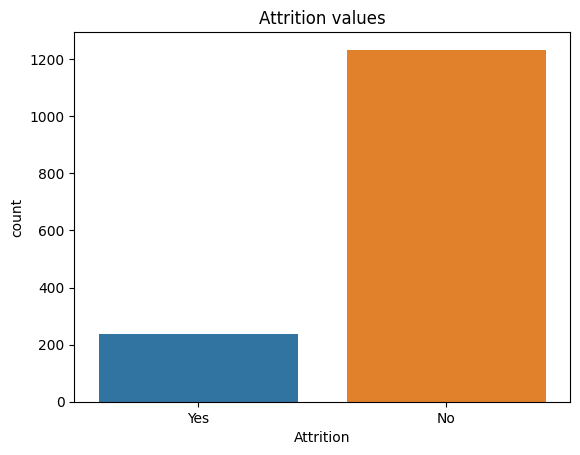

In [18]:
sns.countplot(x=df['Attrition'])
plt.title('Attrition values');

In [19]:
# 1 for NO , 0 for Yes
df["Attrition"] = df["Attrition"].map({"Yes": 0, "No":1})

In [20]:
# select all categorical columns to graph piechart
cat_cols = df.select_dtypes(['object']).columns

cat_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

                   BusinessTravel      Ratio
BusinessTravel                              
Travel_Rarely                1043  70.952381
Travel_Frequently             277  18.843537
Non-Travel                    150  10.204082


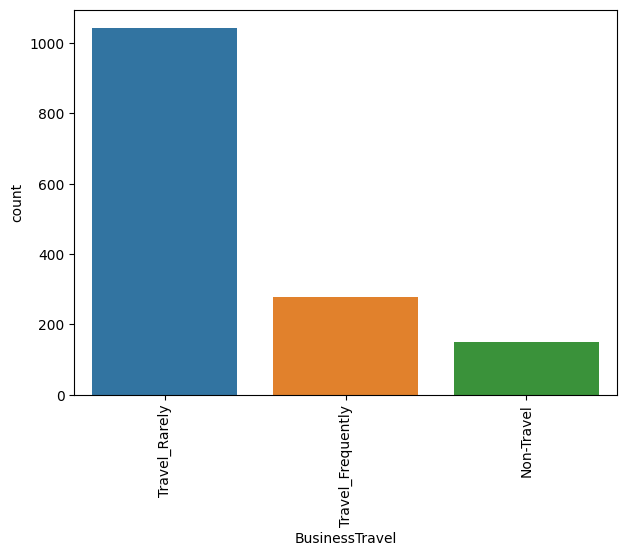

##########################################
                        Department      Ratio
Department                                   
Research & Development         961  65.374150
Sales                          446  30.340136
Human Resources                 63   4.285714


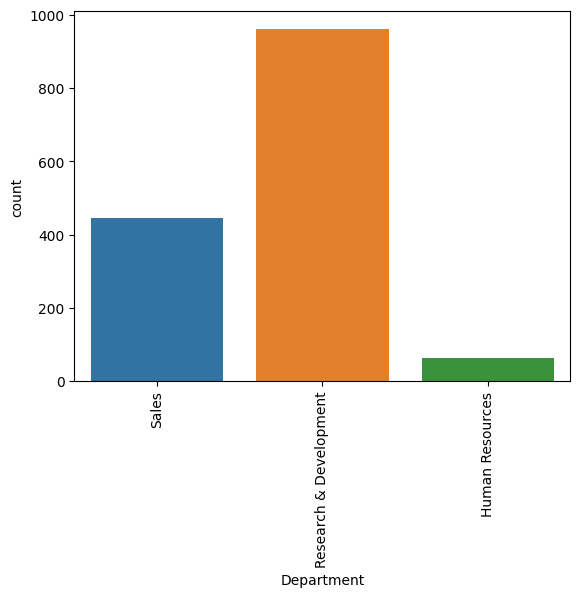

##########################################
                  EducationField      Ratio
EducationField                             
Life Sciences                606  41.224490
Medical                      464  31.564626
Marketing                    159  10.816327
Technical Degree             132   8.979592
Other                         82   5.578231
Human Resources               27   1.836735


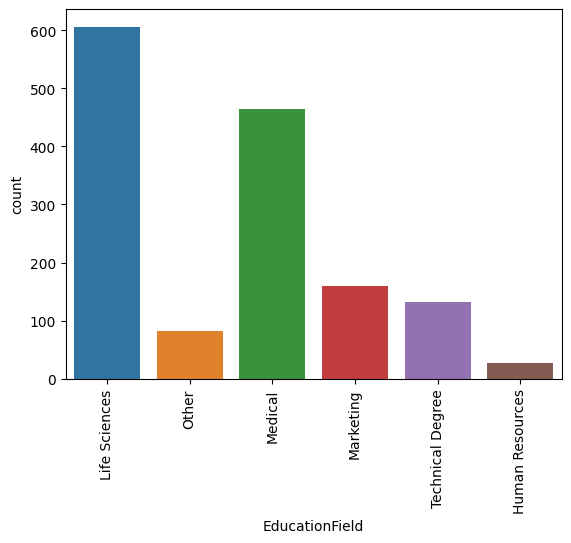

##########################################
        Gender  Ratio
Gender               
Male       882   60.0
Female     588   40.0


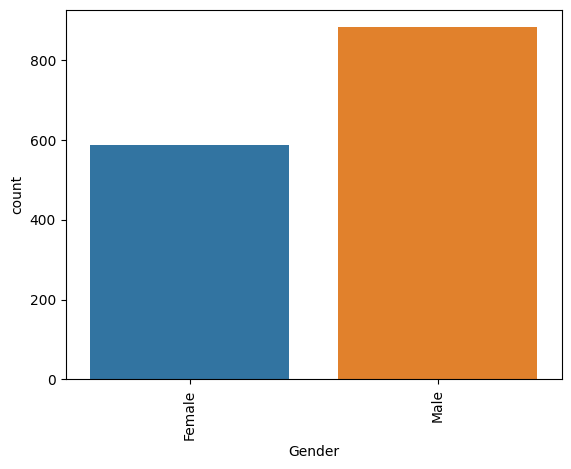

##########################################
                           JobRole      Ratio
JobRole                                      
Sales Executive                326  22.176871
Research Scientist             292  19.863946
Laboratory Technician          259  17.619048
Manufacturing Director         145   9.863946
Healthcare Representative      131   8.911565
Manager                        102   6.938776
Sales Representative            83   5.646259
Research Director               80   5.442177
Human Resources                 52   3.537415


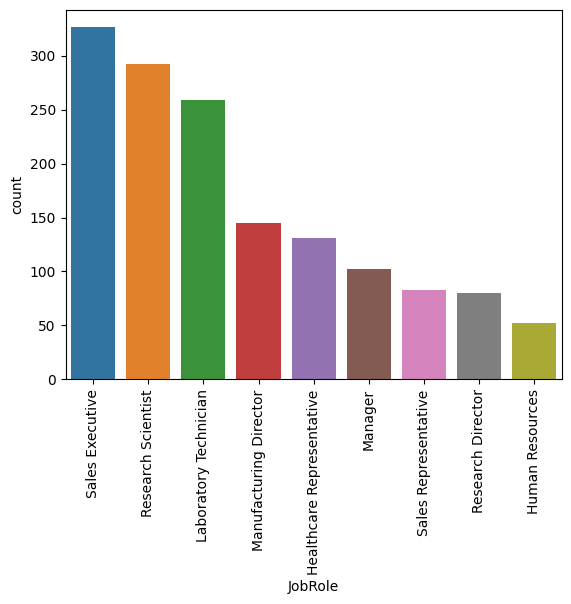

##########################################
               MaritalStatus      Ratio
MaritalStatus                          
Married                  673  45.782313
Single                   470  31.972789
Divorced                 327  22.244898


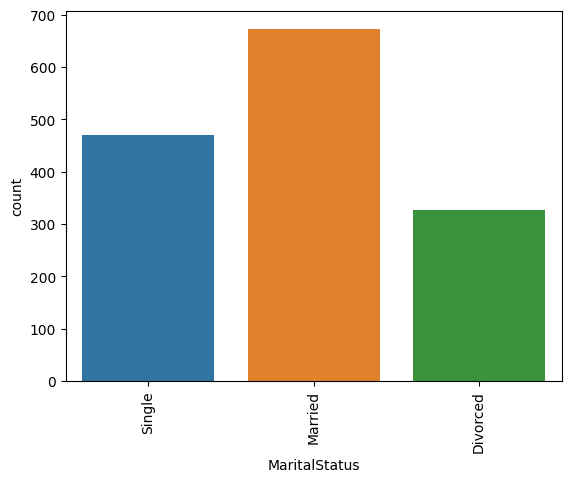

##########################################
          OverTime     Ratio
OverTime                    
No            1054  71.70068
Yes            416  28.29932


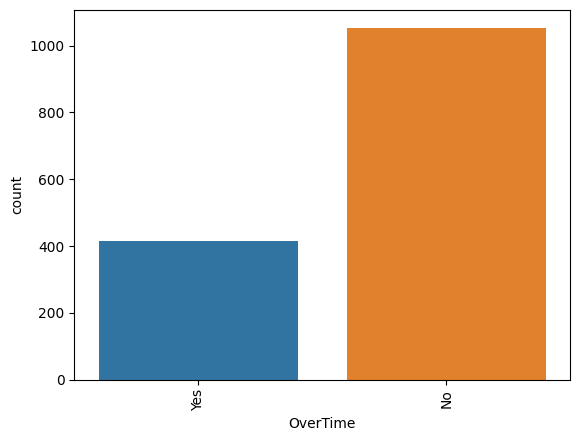

##########################################


In [391]:
plt.figure(figsize=(7, 5))

def cat_summary(df, col_name, plot=False):
    print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "Ratio": 100 * df[col_name].value_counts() / len(df)}))

    if plot:
        ax = sns.countplot(x=df[col_name], data=df)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        plt.show(block=True)

for col in cat_cols:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)
        cat_summary(df, col, plot=True)

    else:
        cat_summary(df, col, plot=True)
        print("##########################################")

# select columns which are categorical except Attrition to graph VS Attrition

In [21]:
cat_cols= df.drop('Attrition',axis=1).select_dtypes(['object']).columns
cat_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

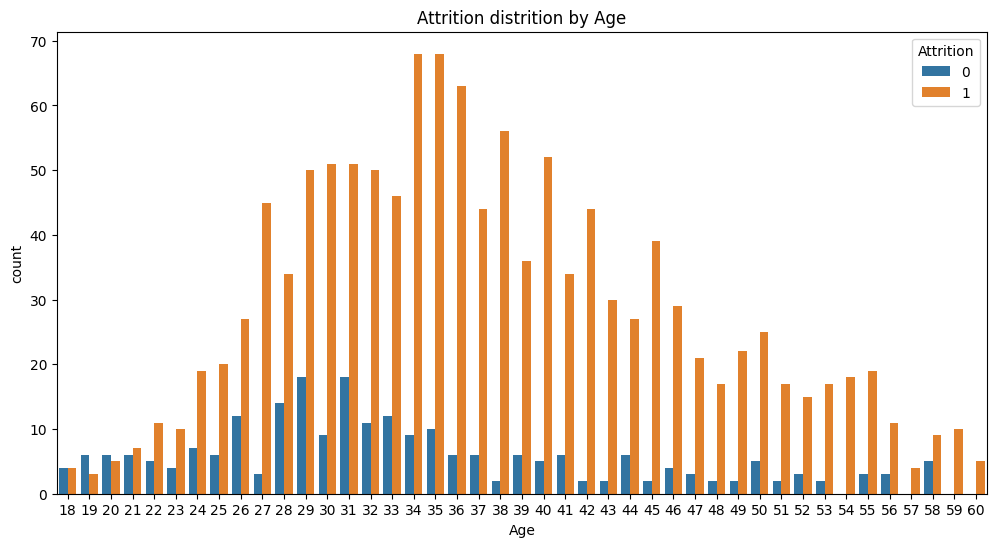

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x="Age", hue='Attrition', data=df)
plt.title("Attrition distrition by Age" )
plt.show()

<Figure size 500x1000 with 0 Axes>

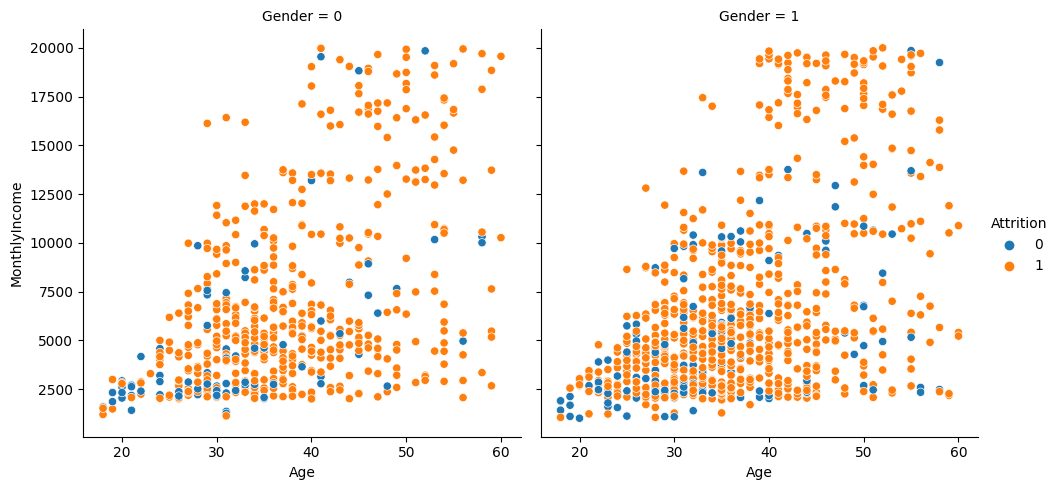

In [409]:
plt.figure(figsize=(5,10))
sns.relplot(data=df,y='MonthlyIncome',x='Age',hue='Attrition',col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

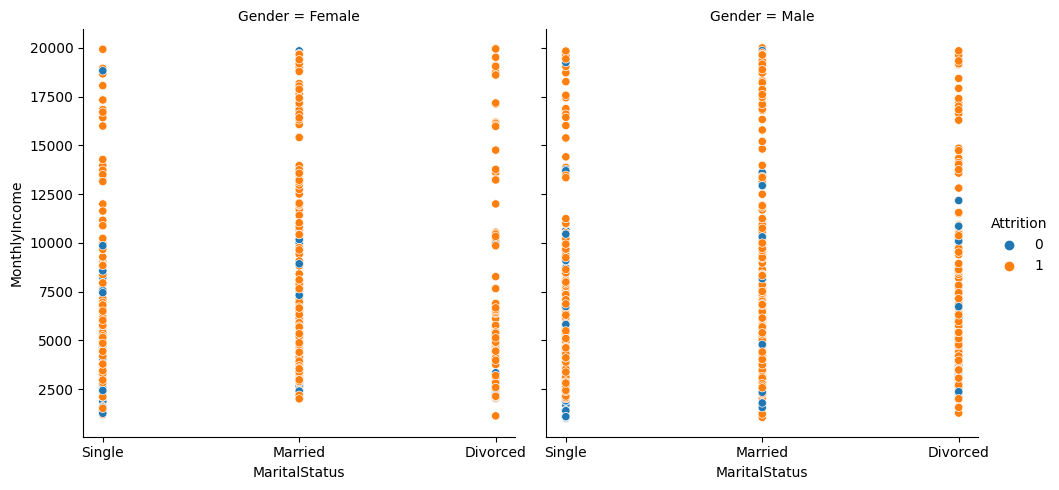

In [24]:
plt.figure(figsize=(5,10))
sns.relplot(data=df,y='MonthlyIncome',x='MaritalStatus',hue='Attrition',col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

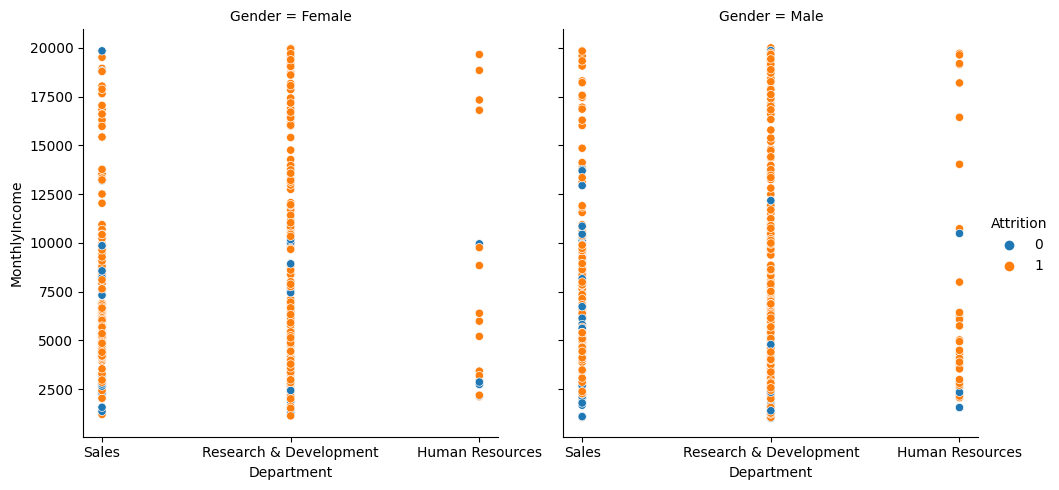

In [25]:
plt.figure(figsize=(5,10))
sns.relplot(data=df,y='MonthlyIncome',x='Department',hue='Attrition',col='Gender')
plt.show()

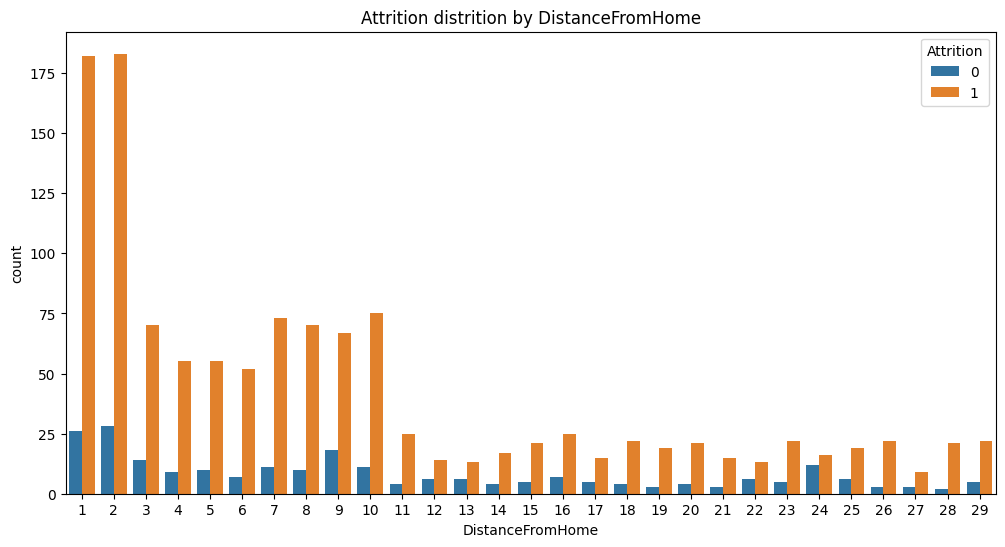

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x="DistanceFromHome", hue='Attrition', data=df)
plt.title("Attrition distrition by DistanceFromHome" )
plt.show()

In [27]:
# encoding categorical variables

df = df.copy()

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Split dataframe into X and y

In [28]:
X=df.drop(columns='Attrition')
y=df['Attrition']

# split dataframe into train and test

In [29]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=42)

# Random Forest Classifier 

In [30]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train , y_train)
RF_model.score(X_train , y_train)
RF_pred = RF_model.predict(X_test)
print( 'accuracy score: ' ,accuracy_score(y_test , RF_pred))

accuracy score:  0.8777173913043478


In [31]:
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

           0       0.71      0.10      0.18        48
           1       0.88      0.99      0.93       320

    accuracy                           0.88       368
   macro avg       0.80      0.55      0.56       368
weighted avg       0.86      0.88      0.84       368



Text(95.72222222222221, 0.5, 'Truh')

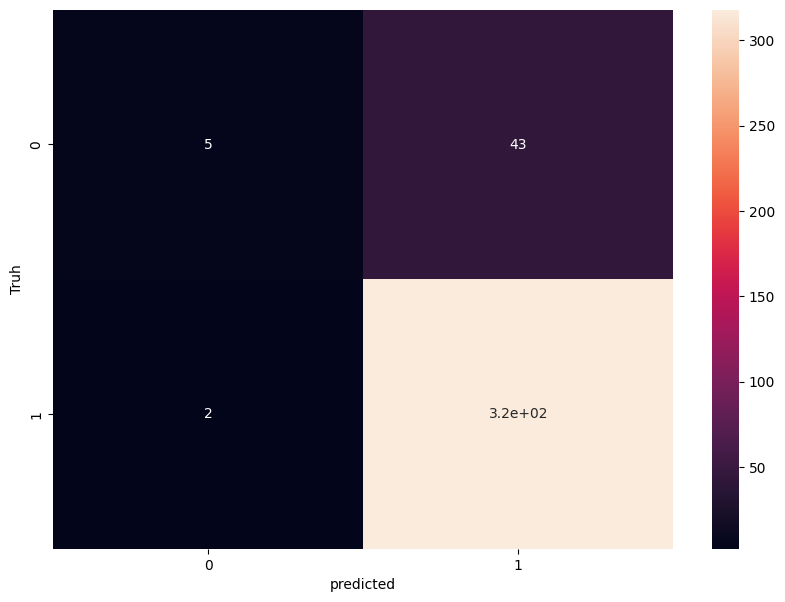

In [32]:
cm1 = confusion_matrix(y_test,RF_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')